# [Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)

## Description

>"There's a thin line between likably old-fashioned and fuddy-duddy, and The Count of Monte Cristo ... never quite settles on either side."

>The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis, originally collected by Pang and Lee [1]. In their work on sentiment treebanks, Socher et al. [2] used Amazon's Mechanical Turk to create fine-grained labels for all parsed phrases in the corpus. This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: negative, somewhat negative, neutral, somewhat positive, positive. Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.

>![Treebank](files/treebank.png)

>Kaggle is hosting this competition for the machine learning community to use for fun and practice. This competition was inspired by the work of Socher et al [2]. We encourage participants to explore the accompanying (and dare we say, fantastic) website that accompanies the paper:

>http://nlp.stanford.edu/sentiment/

>There you will find have source code, a live demo, and even an online interface to help train the model.

>[1] Pang and L. Lee. 2005. Seeing stars: Exploiting class relationships for sentiment categorization with respect to rating scales. In ACL, pages 115–124.

>[2] Recursive Deep Models for Semantic Compositionality Over a Sentiment Treebank, Richard Socher, Alex Perelygin, Jean Wu, Jason Chuang, Chris Manning, Andrew Ng and Chris Potts. Conference on Empirical Methods in Natural Language Processing (EMNLP 2013).

>Image credits: Popcorn - Maura Teague, http://www.flickr.com/photos/93496438@N06/



## Evaluation

>Submissions are evaluated on classification accuracy (the percent of labels that are predicted correctly) for every parsed phrase. The sentiment labels are:

>0 - negative  
>1 - somewhat negative  
2 - neutral  
3 - somewhat positive  
4 - positive  

>__Submission Format__

>For each phrase in the test set, predict a label for the sentiment. Your submission should have a header and look like the following:
```
>PhraseId,Sentiment  
156061,2  
156062,2  
156063,2  
...
```

## Data Description

>The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

>train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

>0 - negative  
1 - somewhat negative  
2 - neutral  
3 - somewhat positive  
4 - positive  

This is my first experience with NLP in the scope of ML. There was a similar [Kaggle competition](https://www.kaggle.com/c/word2vec-nlp-tutorial) but I don't necessarily want to use Google's Word2Vec. 

Let's see what's up here. I'll first explore the data then go from there.

1. [Exploration](#exploration)
2. [Preprocessing](#preprocessing)
  1. [Contractions](#contractions)
  2. [Stop Words](#stopwords)
  3. [One-hot Encoding](#onehot)
3. [Analysis](#analysis)

# <a name="exploration">Exploration</a>

In [1]:
### Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Import datasets
train = pd.read_csv('Data/train.tsv', sep='\t')
test = pd.read_csv('Data/test.tsv', sep='\t')

__Going through the usual motions here:__

In [3]:
train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [4]:
test.head()

PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly routine

In [5]:
train.describe(include='all')

PhraseId     SentenceId  \
count   156060.000000  156060.000000   
unique            NaN            NaN   
top               NaN            NaN   
freq              NaN            NaN   
mean     78030.500000    4079.732744   
std      45050.785842    2502.764394   
min          1.000000       1.000000   
25%      39015.750000    1861.750000   
50%      78030.500000    4017.000000   
75%     117045.250000    6244.000000   
max     156060.000000    8544.000000   

                                                   Phrase      Sentiment  
count                                              156060  156060.000000  
unique                                             156060            NaN  
top     rotten in almost every single facet of product...            NaN  
freq                                                    1            NaN  
mean                                                  NaN       2.063578  
std                                                   NaN       0.893832  
min                                                   NaN       0.000000  
25%                                                   NaN       2.000000  
50%                                                   NaN       2.000000  
75%                                                   NaN       3.000000  
max                                                   NaN       4.000000

In [6]:
test.describe(include='all')

PhraseId    SentenceId                                    Phrase
count    66292.00000  66292.000000                                     66292
unique           NaN           NaN                                     66292
top              NaN           NaN  to revitalize the British gangster movie
freq             NaN           NaN                                         1
mean    189206.50000  10114.909144                                       NaN
std      19136.99636    966.787807                                       NaN
min     156061.00000   8545.000000                                       NaN
25%     172633.75000   9266.000000                                       NaN
50%     189206.50000  10086.000000                                       NaN
75%     205779.25000  10941.000000                                       NaN
max     222352.00000  11855.000000                                       NaN

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [9]:
# Do any features of NaNs?
train.isnull().any()

PhraseId      False
SentenceId    False
Phrase        False
Sentiment     False
dtype: bool

In [10]:
test.isnull().any()

PhraseId      False
SentenceId    False
Phrase        False
dtype: bool

Of course not...

__It seems everyone is pretty meh about movies:__

In [11]:
# s = 4
#train[train.Sentiment == s].shape
train.Sentiment.value_counts().sort_index()

0     7072
1    27273
2    79582
3    32927
4     9206
Name: Sentiment, dtype: int64

[Text(0,0.5,'Counts (%)'), Text(0.5,0,'Sentiment')]

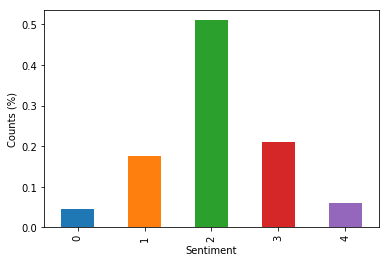

In [12]:
ax = train.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')#, x='Sentiment', y='Counts (%)')
ax.set(xlabel="Sentiment", ylabel="Counts (%)")

__It seems each row/instance contains a unique PhraseId, and some number of PhraseIds are formed from a single SentenceId:__

In [13]:
# Number of unique sentences
train.SentenceId.values.max()

8544

In [14]:
# Number of unique phrases
train.PhraseId.values.max()

156060

__Anyway, let's look at the first SentenceId (PhraseId and SentenceId start at 1):__

In [15]:
sid1 = train[train['SentenceId'] == 1]
sid1

PhraseId  SentenceId                                             Phrase  \
0          1           1  A series of escapades demonstrating the adage ...   
1          2           1  A series of escapades demonstrating the adage ...   
2          3           1                                           A series   
3          4           1                                                  A   
4          5           1                                             series   
5          6           1  of escapades demonstrating the adage that what...   
6          7           1                                                 of   
7          8           1  escapades demonstrating the adage that what is...   
8          9           1                                          escapades   
9         10           1  demonstrating the adage that what is good for ...   
10        11           1                            demonstrating the adage   
11        12           1                                      demonstrating   
12        13           1                                          the adage   
13        14           1                                                the   
14        15           1                                              adage   
15        16           1                    that what is good for the goose   
16        17           1                                               that   
17        18           1                         what is good for the goose   
18        19           1                                               what   
19        20           1                              is good for the goose   
20        21           1                                                 is   
21        22           1                                 good for the goose   
22        23           1                                               good   
23        24           1                                      for the goose   
24        25           1                                                for   
25        26           1                                          the goose   
26        27           1                                              goose   
27        28           1  is also good for the gander , some of which oc...   
28        29           1  is also good for the gander , some of which oc...   
29        30           1                                            is also   
..       ...         ...                                                ...   
33        34           1  the gander , some of which occasionally amuses...   
34        35           1                                       the gander ,   
35        36           1                                         the gander   
36        37           1                                             gander   
37        38           1                                                  ,   
38        39           1  some of which occasionally amuses but none of ...   
39        40           1                                      some of which   
40        41           1                                               some   
41        42           1                                           of which   
42        43           1                                              which   
43        44           1  occasionally amuses but none of which amounts ...   
44        45           1                                       occasionally   
45        46           1  amuses but none of which amounts to much of a ...   
46        47           1                                             amuses   
47        48           1       but none of which amounts to much of a story   
48        49           1                                                but   
49        50           1           none of which amounts to much of a story   
50        51           1                                               none   
51        52           1                of which amoun

In [16]:
# sid1 "sorted" by length of Phrase
sid1.reindex(sid1.Phrase.str.len().sort_values().index)

PhraseId  SentenceId                                             Phrase  \
62        63           1                                                  .   
3          4           1                                                  A   
37        38           1                                                  ,   
56        57           1                                                 to   
6          7           1                                                 of   
20        21           1                                                 is   
48        49           1                                                but   
24        25           1                                                for   
13        14           1                                                the   
50        51           1                                               none   
40        41           1                                               some   
30        31           1                                               also   
22        23           1                                               good   
18        19           1                                               what   
16        17           1                                               that   
58        59           1                                               much   
14        15           1                                              adage   
42        43           1                                              which   
61        62           1                                              story   
26        27           1                                              goose   
4          5           1                                             series   
46        47           1                                             amuses   
36        37           1                                             gander   
54        55           1                                            amounts   
60        61           1                                            a story   
29        30           1                                            is also   
2          3           1                                           A series   
41        42           1                                           of which   
12        13           1                                          the adage   
8          9           1                                          escapades   
..       ...         ...                                                ...   
44        45           1                                       occasionally   
34        35           1                                       the gander ,   
39        40           1                                      some of which   
11        12           1                                      demonstrating   
23        24           1                                      for the goose   
57        58           1                                    much of a story   
55        56           1                                 to much of a story   
21        22           1                                 good for the goose   
19        20           1                              is good for the goose   
10        11           1                            demonstrating the adage   
17        18           1                         what is good for the goose   
53        54           1                         amounts to much of a story   
15        16           1                    that what is good for the goose   
52        53           1                   which amounts to much of a story   
51        52           1                of which amounts to much of a story   
49        50           1           none of which amounts to much of a story   
47        48           1       but none of which amounts to much of a story   
45        46           1  amuses but none of which amounts to much of a ...   
9         10           1  demonstrating the adage that

In [17]:
# Longest phrase in SentenceId=1
lp1 = sid1.Phrase.str.len().max().argmax()
print(lp1, sid1.Phrase.iloc[lp1])

0 A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .


The longest phrase in sid1 is also the first phrase. I wonder if that's true for all?

In [18]:
# Longest phrase in SentenceId=2
sid2 = train[train['SentenceId'] == 2]
lp2 = sid2.Phrase.str.len().max().argmax()
print(lp2, sid2.Phrase.iloc[0])

0 This quiet , introspective and entertaining independent is worth seeking .


In [19]:
# Longest phrase in SentenceId=3
sid3 = train[train['SentenceId'] == 3]
lp3 = sid3.Phrase.str.len().max().argmax()
print(lp3, sid3.Phrase.iloc[0])

0 Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .


Seems so.

__Let's look at the smallest unit of sentiment: single words.__

In [20]:
# Silence warning. drop() throws warning.
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

# Create DF of all single words in SentenceId and make them all lowercase
singlewords = train[train.Phrase.str.split().str.len() == 1]
#phrase = singlewords.Phrase.str.lower()
#singlewords.drop('Phrase', axis=1, inplace=True)
##singlewords['Phrase'] = phrase.str.lower()
#singlewords.insert(2, 'Phrase', phrase)
singlewords['Phrase'] = singlewords['Phrase'].str.lower()
singlewords.head()

PhraseId  SentenceId         Phrase  Sentiment
3          4           1              a          2
4          5           1         series          2
6          7           1             of          2
8          9           1      escapades          2
11        12           1  demonstrating          2

In [21]:
# Get value_counts() of single word phrases
singlewords_counts = singlewords.Phrase.value_counts()
singlewords_counts.head()

biography         1
flabbergasting    1
slow-paced        1
ear-splitting     1
demise            1
Name: Phrase, dtype: int64

Unless I've done something wrong, it seems all phrases are unique. That is, there is a single PhraseID for "a", "what", etc regardless of how many times it shows up in a single SentenceId or how many SentenceIds contain that word. So one couldn't get the most used words, etc. from this dataset. We can at least (obviously) get the highest/lowest sentiment phrases/words from this dataset.

Sentiments from full dataset:

In [22]:
# FYI head and tail can be displayed simulaneaously via df.iloc[np.r_[0:5, -5:0]]
# From https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail
train.sort_values(by='Sentiment').head()

PhraseId  SentenceId  \
55690      55691        2785   
148142    148143        8062   
148141    148142        8062   
59657      59658        3010   
137237    137238        7425   

                                                   Phrase  Sentiment  
55690   A derivative collection of horror and sci-fi c...          0  
148142  a plotline that 's as lumpy as two-day old por...          0  
148141  ... a plotline that 's as lumpy as two-day old...          0  
59657   you 're rooting for the film to hurry up and g...          0  
137237  is a movie so insecure about its capacity to e...          0

In [23]:
train.sort_values(by='Sentiment').tail()

PhraseId  SentenceId  \
146074    146075        7943   
132810    132811        7161   
146080    146081        7943   
37946      37947        1805   
147135    147136        8007   

                                                   Phrase  Sentiment  
146074  the talented cast alone will keep you watching...          4  
132810                   compelling supporting characters          4  
146080       keep you watching , as will the fight scenes          4  
37946   's as rude and profane as ever , always hilari...          4  
147135  that begins with the everyday lives of naval p...          4

Sentiments from single word dataset:

In [24]:
singlewords.sort_values(by='Sentiment').head()

PhraseId  SentenceId                  Phrase  Sentiment
21732      21733         971               worthless          0
42157      42158        2028                one-star          0
138709    138710        7516  soon-to-be-forgettable          0
95032      95033        4957                  bitchy          0
24420      24421        1110          disappointment          0

In [25]:
singlewords.sort_values(by='Sentiment').tail()

PhraseId  SentenceId       Phrase  Sentiment
3671       3672         138        fresh          4
36927     36928        1749   delightful          4
16397     16398         705  astonishing          4
362         363          13          joy          4
3293       3294         124     riveting          4

# <a name="preprocessing">Preprocessing</a>

### <a name="contractions">Maybe we can clean the data by expanding all contractions</a>

In [26]:
# Assume all contractions employ an apostrophe '
train.Phrase[train.Phrase.str.contains('\'')].head()

81    Even fans of Ismail Merchant 's work , I suspe...
82                 Even fans of Ismail Merchant 's work
86                           of Ismail Merchant 's work
87                              Ismail Merchant 's work
88                                   Ismail Merchant 's
Name: Phrase, dtype: object

Of course some apostrophes are for "...'s", but others should be "...n't", etc. Let's look at that now.

In [27]:
nt = 'n\'t'
snot = 'not' # PhraseId is already parsed with space between "does" and "n't", e.g.
NOT = train[train.Phrase.str.contains(nt)]
NOT.head()

PhraseId  SentenceId                                 Phrase  Sentiment
247       248           9  But it does n't leave you with much .          1
248       249           9      it does n't leave you with much .          1
249       250           9         does n't leave you with much .          1
250       251           9           does n't leave you with much          1
251       252           9                               does n't          1

In [28]:
# Need to parse words first
#train.Phrase[train.Phrase.str.contains(nt)].str.split().replace(nt,snot).head()#.str.join(' ').head()
# Just kidding:
NOT['Phrase'] = NOT['Phrase'].str.replace(nt, snot)
NOT.head()

PhraseId  SentenceId                                 Phrase  Sentiment
247       248           9  But it does not leave you with much .          1
248       249           9      it does not leave you with much .          1
249       250           9         does not leave you with much .          1
250       251           9           does not leave you with much          1
251       252           9                               does not          1

Neat. Now let's do this with all known contractions...

In [29]:
# n't, 've, 're, 'll, 'd, 'm, 's
# the 's could be tricky...
contractions = ['n\'t', '\'ve', '\'re', '\'ll', '\'d', '\'m', '\'s']
full = ['not', 'have', 'are', 'will', 'would', 'am', 'is']

#for c,f in zip(contractions,full):
#    train['Phrase'] = train['Phrase'].str.replace(c,f)

In [30]:
train.Phrase[train.Phrase.str.contains('\'')]

Quotation marks remain, and abbrevations for decades. Maybe other things. 

__But I just realized... Perhaps sentiment changes when contractions are used. Uh oh. Let's just not do the above...__

### <a name="stopwords">Stop Words</a>

[Stop words](https://en.wikipedia.org/wiki/Stop_words) are common words that  may be removed from the dataset without loss of analysis potential. I've ignored these for now. Not ignoring these should significantly speed up training due to reduction in total dimensions.

### <a name="onehot">One-hot Encoding</a>

Perhaps we could analyze all PhraseIds at the character level. That means we need to split everything to individual characters and attempt [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

Emilie mentioned that it's probably better to map WORDS instead of CHARACTERS.


In [31]:
traintest = pd.concat([train,test])
uniquewords = traintest.Phrase.str.split(' ', expand=True).stack().unique()
print('words dim =',len(uniquewords))

import string
printable = string.digits + string.ascii_lowercase + string.punctuation + ' '
pad = max(train.Phrase.str.len().max(), test.Phrase.str.len().max())
print('chars dim =',len(printable)*pad)

words dim = 21638
chars dim = 19527


But seen here, characters still holds better dimensionality. Large phrases, hers may be better; larger dataset (more unique words), mine may be better.

What I am trying to do here: take all Phrases and transform them into a one-hot matrix. To me, this is effectively an "image" that can hopefully be flattened and processed from there. This does increase the dimensions a lot, though... I think this is a common problem.

1. PhraseId from single string to padded array of single characters
2. Map character to zero-array with 1 at specific index
3. Flatten for analysis

In [32]:
### 1. PhraseId from single string to padded array of single characters
# Longest phrase, in number of characters, in either train or test
pad = max(train.Phrase.str.len().max(), test.Phrase.str.len().max())

# Make new df with padded lowercase PhraseId. Assume letter case doesn't matter.
# Create new DF with PhraseId: 
# ['String1', 'Str2', ...] --> 
#   [ ['s', 't','r','i','n','g','1'], ['s','t','r','2',' ',' ',' '], ... ]
train2 = train.copy()
train2['Phrase'] = train2['Phrase'].str.lower(). \
                      str.pad(width=pad,side='right',fillchar=' '). \
                      apply(lambda x: np.array(list(x)))

test2 = test.copy()
test2['Phrase'] = test2['Phrase'].str.lower(). \
                      str.pad(width=pad,side='right',fillchar=' '). \
                      apply(lambda x: np.array(list(x)))

In [33]:
pd.set_option('display.max_columns', 500)
train2.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  [a,  , s, e, r, i, e, s,  , o, f,  , e, s, c, ...   
1         2           1  [a,  , s, e, r, i, e, s,  , o, f,  , e, s, c, ...   
2         3           1  [a,  , s, e, r, i, e, s,  ,  ,  ,  ,  ,  ,  , ...   
3         4           1  [a,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...   
4         5           1  [s, e, r, i, e, s,  ,  ,  ,  ,  ,  ,  ,  ,  , ...   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [34]:
### 2. Map character to zero-array with 1 at specific index
# Create string with available ascii characters
import string
printable = string.digits + string.ascii_lowercase + string.punctuation + ' '

# Keys are ASCII characters
keys = list(printable)#.sort()
# Values are np.zeros with 1 at appropriate index
values = []
for i in range(len(printable)):
    #print(i+1,'/',len(printable))
    value = np.zeros(len(printable)).astype(int)
    value[i] = 1
    values.append(value)#np.array(value).astype(int))
dict = {}
for i in range(len(keys)):
    #print(i+1,'/',len(keys))
    dict[keys[i]] = values[i]   

print('e.g., dict(\'a\') =', dict['a'])

e.g., dict('a') = [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
### Loop through dataframes, creating one-hots
# tr,te for testing for now. Remove head() when done testing or change H
# H = number of instances to use
H = 200
tr2 = train2.copy().head(H)
te2 = test2.copy().head(H)

# list of dataframes
train_onehots_list = []
test_onehots_list = []

# (index, row)
for (traini,trainr), (testi,testr) in zip(tr2.iterrows(), te2.iterrows()):
    
    # For training data
    train_onehot = pd.DataFrame(columns=list(printable))
    for i,char in enumerate(trainr.Phrase):
        train_onehot.loc[i] = dict[char]
    # For whatever reason NaNs were present(?). Found via sns.heatmap error.
    train_onehots_list.append(train_onehot.fillna(0))
    
    # For test data
    test_onehot = pd.DataFrame(columns=list(printable))
    for i,char in enumerate(testr.Phrase):
        test_onehot.loc[i] = dict[char]
    test_onehots_list.append(test_onehot.fillna(0))

In [36]:
pd.set_option('display.max_columns', 500)
train_onehots_list[0].head()

0  1  2  3  4  5  6  7  8  9  a  b  c  d  e  f  g  h  i  j  k  l  m  n  o  \
0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

   p  q  r  s  t  u  v  w  x  y  z  !  "  #  $  %  &  '  (  )  *  +  ,  -  .  \
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

   /  :  ;  <  =  >  ?  @  [  \  ]  ^  _  `  {  |  }  ~     
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  
2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [37]:
### 3. Create arrays from lists and flatten for analysis
# Array of arrays. Does not retain columns/chars
train_onehots_array = np.array([i.values for i in train_onehots_list])
test_onehots_array = np.array([i.values for i in test_onehots_list])

# Flatten arrays, setting dom from (y,) to (y,1)
flatdim = len(printable)*pad
train_onehots_flat = np.array([np.reshape(i.flatten(), (flatdim,1)) for i in train_onehots_array])
test_onehots_flat = np.array([np.reshape(i.flatten(), (flatdim,1)) for i in test_onehots_array])

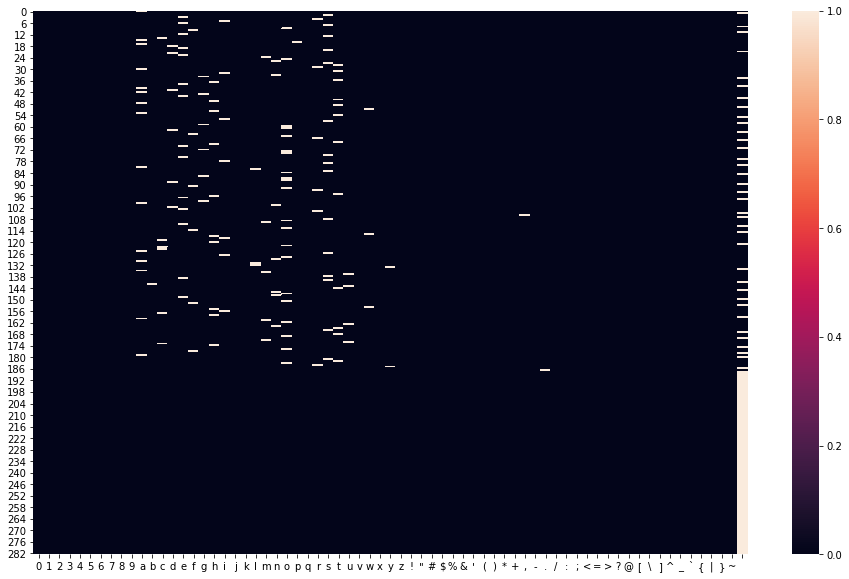

In [38]:
### Plot example one-hot
import seaborn as sns
plt.figure(figsize=(16, 10))
#f, ax = plt.subplots(1,3, sharey=True, figsize=(11,11))
sns.heatmap(train_onehots_list[0])#, ax=ax[0])
#sns.heatmap(onehots_list[1], ax=ax[1])
#sns.heatmap(onehots_list[2], ax=ax[2])

Above is the "image" for the Phrase

In [39]:
''.join(train2.Phrase[0])

'a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .                                                                                               '

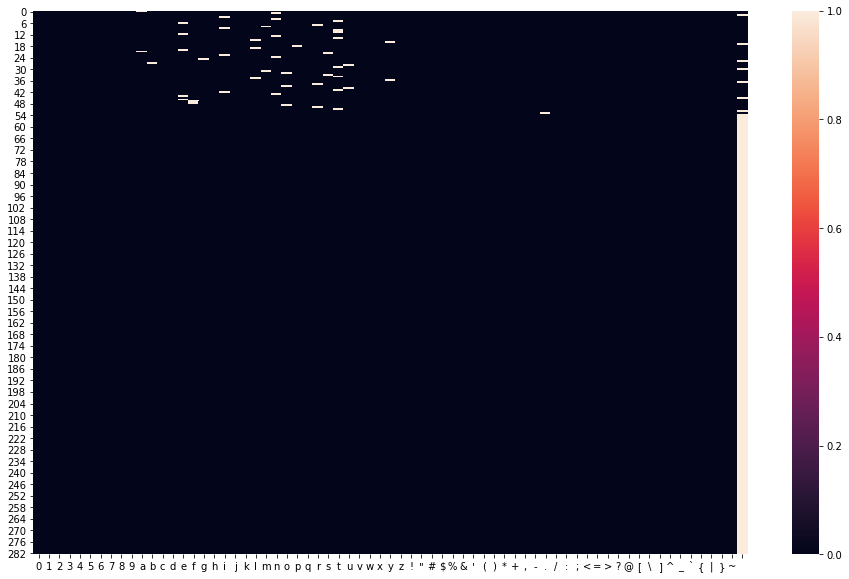

In [40]:
### Plot another example one-hot
plt.figure(figsize=(16, 10))
sns.heatmap(test_onehots_list[0])

And again, above is the "image" for the Phrase

In [41]:
''.join(test2.Phrase[0])

'an intermittently pleasing but mostly routine effort .                                                                                                                                                                                                                                     '

In [42]:
# Create accompanying array of sentiments to onehots
train_sentiments = np.reshape(tr2.Sentiment.values, (len(tr2),1))
# Test has no sentiments feature, remember?
#test_sentiments = np.reshape(te2.Sentiment.values, (len(te2),1))

# <a name="analysis">Analysis</a>

So I looked at the data, preprocessed it, and thought about how to analyze it. There are a few commonly-used prebuilt NLP analysis tools:
1. [Vowpal Wabbit](https://github.com/JohnLangford/vowpal_wabbit/wiki)
2. [Stanford CoreNLP](https://github.com/stanfordnlp/CoreNLP)
3. [Word2vec](https://en.wikipedia.org/wiki/Word2vec)

And commonly-used ML algorithms:
1. [CNN](https://en.wikipedia.org/wiki/Convolutional_neural_network)
2. [RNN-LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory)

In [43]:
# Rename data for easier reading
# And split training data into (another) train and test
import copy

Input = copy.deepcopy(train_onehots_flat)
Output = copy.deepcopy(train_sentiments)

# Train is split percent of data
split = 0.8
splitnum = int(round(Input.shape[0]*split))

test_input = Input[splitnum:]
test_output = Output[splitnum:]

train_input = Input[:splitnum]
train_output = Output[:splitnum]

In [44]:
li,mi,ni = train_input.shape
lo,mo = np.shape(train_output)
print('train:')
print('li mi ni =', train_input.shape)
print('lo mo =', np.shape(train_output))
print('test:')
print(test_input.shape)
print(np.shape(test_output))

train:
li mi ni = (160, 19527, 1)
lo mo = (160, 1)
test:
(40, 19527, 1)
(40, 1)


In [45]:
# From http://monik.in/a-noobs-guide-to-implementing-rnn-lstm-using-tensorflow/
import tensorflow as tf
#print(tf.__version__)

In [46]:
# [Batch Size, Sequence Length, Input Dimension]
# Number of examples, number of input, dimension of each input
data = tf.placeholder(tf.float32, [None, mi, ni]) #[None, mi, ni]
target = tf.placeholder(tf.float32, [None, mo]) #[None, mo]

In [47]:
num_hidden = 24
#cell = tf.nn.rnn_cell.LSTMCell(num_hidden,state_is_tuple=True)
cell = tf.nn.rnn_cell.BasicRNNCell(num_hidden)

In [48]:
val, state = tf.nn.dynamic_rnn(cell, data, dtype=tf.float32)

In [49]:
val = tf.transpose(val, [1, 0, 2])
last = tf.gather(val, int(val.get_shape()[0]) - 1)

In [50]:
weight = tf.Variable(tf.truncated_normal([num_hidden, int(target.get_shape()[1])]))
bias = tf.Variable(tf.constant(0.1, shape=[target.get_shape()[1]]))

In [51]:
prediction = tf.nn.softmax(tf.matmul(last, weight) + bias)

In [52]:
cross_entropy = -tf.reduce_sum(target * tf.log(tf.clip_by_value(prediction,1e-10,1.0)))

In [53]:
optimizer = tf.train.AdamOptimizer()
minimize = optimizer.minimize(cross_entropy)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [54]:
mistakes = tf.not_equal(tf.argmax(target, 1), tf.argmax(prediction, 1))
error = tf.reduce_mean(tf.cast(mistakes, tf.float32))

In [55]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [56]:
p = 1  # Some percent of test_input size for batch size 
batch_size = int(round(p/100 * len(train_input))) #1000
if batch_size == 0: batch_size = 1
no_of_batches = int(len(train_input)/batch_size)

print('percent =', p)
print('batch size =', batch_size)
print('n of batches =', no_of_batches)

epochs = 10 #50000
print('epochs =', epochs)

for i in range(epochs):
    ptr = 0
    for j in range(no_of_batches):
        inp, out = train_input[ptr:ptr+batch_size], train_output[ptr:ptr+batch_size]
        ptr+=batch_size
        sess.run(minimize,{data: inp, target: out})
    print('Epoch '+str(i)+'...')
    #incorrect = sess.run(error,{data: test_input, target: test_output})
    #print('Epoch{:2d}: Error {:3.1f}%'.format(i + 1, 100 * incorrect))
incorrect = sess.run(error,{data: test_input, target: test_output})
print('Epoch {:2d}: Error {:3.1f}%'.format(i + 1, 100 * incorrect))
sess.close()

percent = 1
batch size = 2
n of batches = 80
epochs = 10
Epoch 1: Error 0.0%
Epoch 2: Error 0.0%


KeyboardInterrupt: 

In [ ]:
'''
import numpy as np
from random import shuffle
 
train_input = ['{0:020b}'.format(i) for i in range(2**10)]
shuffle(train_input)
train_input = [map(int,i) for i in train_input]
ti  = []
for i in train_input:
    temp_list = []
    for j in i:
            temp_list.append([j])
    ti.append(np.array(temp_list))
train_input = ti

train_output = []
 
for i in train_input:
    count = 0
    for j in i:
        if j[0] == 1:
            count+=1
    temp_list = ([0]*21)
    temp_list[count]=1
    train_output.append(temp_list)
    
NUM_EXAMPLES = 1000
test_input = train_input[NUM_EXAMPLES:]
test_output = train_output[NUM_EXAMPLES:] #everything beyond 10,000
 
train_input = train_input[:NUM_EXAMPLES]
train_output = train_output[:NUM_EXAMPLES] #till 10,000

print('train:')    
#print(train_input[0], np.shape(train_input[0]))
#print(train_output[0], np.shape(train_output[0]))
print(np.shape(train_input), np.shape(train_output))
print('\ntest')
print(np.shape(test_input), np.shape(test_output))
'''